In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv(r"E:\projects\data\train_data_clean.csv")
data = pd.read_csv(r"E:\data\train.csv")

In [3]:
data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [31]:
train_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,Subgrade,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,loan_paid_back
0,29367.99,0.084,736.0,2528.42,13.67,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22108.02,0.166,636.0,4593.10,12.92,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,49566.20,0.097,694.0,17005.15,9.76,5.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25496.70,0.053,665.0,12184.43,10.21,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,44940.30,0.058,653.0,12159.92,12.24,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
# Feature selection techniue

numeric_data = data.select_dtypes(include = [np.number])
numeric_data.head()


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,1.0
1,1,22108.02,0.166,636,4593.10,12.92,0.0
2,2,49566.20,0.097,694,17005.15,9.76,1.0
3,3,46858.25,0.065,533,4682.48,16.10,1.0
4,4,25496.70,0.053,665,12184.43,10.21,1.0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

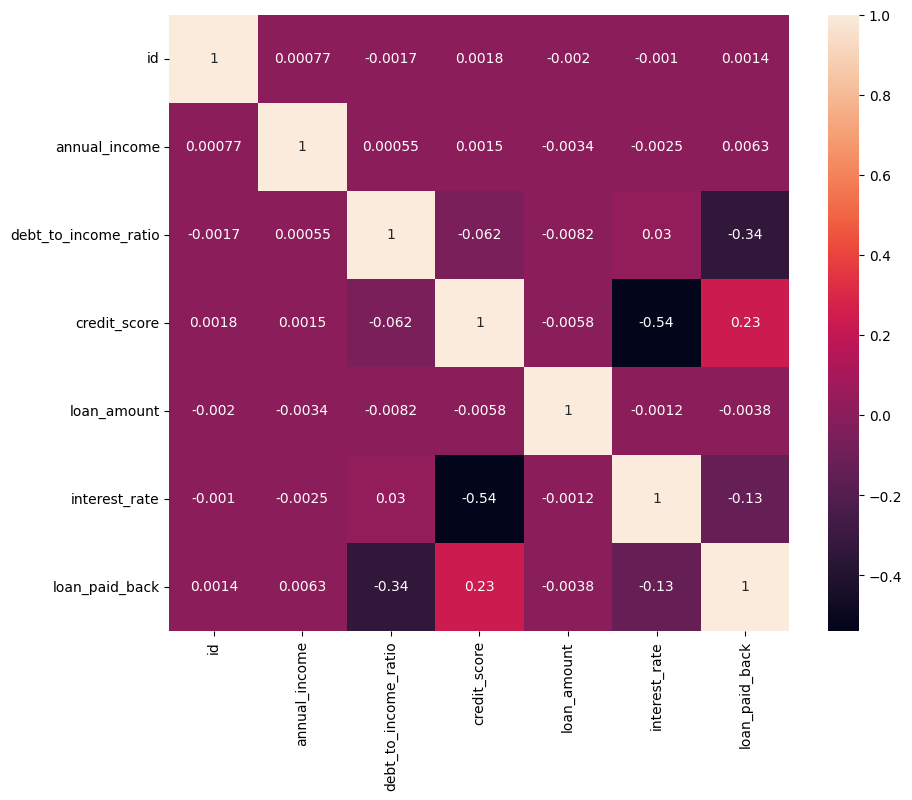

In [33]:
plt.figure(figsize=[10,8])
sns.heatmap(numeric_data.corr(),annot=True)

In [34]:
numeric_data.corr()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
id,1.000000,0.000775,-0.001679,0.001772,-0.001973,-0.001020,0.001387
annual_income,0.000775,1.000000,0.000553,0.001509,-0.003407,-0.002507,0.006326
debt_to_income_ratio,-0.001679,0.000553,1.000000,-0.061617,-0.008236,0.030316,-0.335680
credit_score,0.001772,0.001509,-0.061617,1.000000,-0.005761,-0.538335,0.234560
loan_amount,-0.001973,-0.003407,-0.008236,-0.005761,1.000000,-0.001174,-0.003762
interest_rate,-0.001020,-0.002507,0.030316,-0.538335,-0.001174,1.000000,-0.131184
loan_paid_back,0.001387,0.006326,-0.335680,0.234560,-0.003762,-0.131184,1.000000


In [35]:
cat_col = data.select_dtypes(include =('object'))

In [36]:
y = data['loan_paid_back']

In [30]:
train_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,Subgrade,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,loan_paid_back
0,29367.99,0.084,736.0,2528.42,13.67,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22108.02,0.166,636.0,4593.10,12.92,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,49566.20,0.097,694.0,17005.15,9.76,5.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25496.70,0.053,665.0,12184.43,10.21,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,44940.30,0.058,653.0,12159.92,12.24,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
X = train_data.drop('loan_paid_back',axis = 1)
y=train_data['loan_paid_back']

In [22]:
cat_col

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,Female,Single,High School,Self-employed,Other,C3
1,Male,Married,Master's,Employed,Debt consolidation,D3
2,Male,Single,High School,Employed,Debt consolidation,C5
3,Female,Single,High School,Employed,Debt consolidation,F1
4,Male,Married,High School,Employed,Other,D1
...,...,...,...,...,...,...
593989,Female,Single,High School,Employed,Business,C3
593990,Male,Single,Bachelor's,Employed,Debt consolidation,F5
593991,Female,Married,Bachelor's,Employed,Debt consolidation,C1
593992,Male,Single,Bachelor's,Employed,Debt consolidation,B2


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

print("Selected features:")
print(cat_col.columns[selector.get_support()])